<a href="https://colab.research.google.com/github/micaela-rut/data_science_clusterai2021_Rutsztein/blob/main/Grupo6_aterrizajes_y_despegues_ANAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías y Drive

In [1]:
#Importar paquetes de herramientas:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
import sklearn.neighbors
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
root_path = "/content/gdrive/MyDrive/Ciencia de Datos - Grupo 6/"
plot_path = root_path + "Graficos/" 

# Importar Dataset

In [5]:
df = pd.read_csv(root_path + "202109_informe_ministerio.csv",index_col=False,error_bad_lines=False, delimiter=';')

In [6]:
filas = np.shape(df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(df)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}\r\n')

print('Output de ".head(5)": ')
df.head(5)

Filas: 219803
Columnas: 11

Output de ".head(5)": 


,Fecha,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Calidad dato
0,01/01/2021,00:02,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


In [7]:
nombre_columnas1 = df.columns.values
nombre_columnas1

array(['Fecha', 'Hora UTC', 'Clase de Vuelo (todos los vuelos)',
       'Clasificación Vuelo', 'Tipo de Movimiento', 'Aeropuerto',
       'Origen / Destino', 'Aerolinea Nombre', 'Aeronave', 'Pasajeros',
       'Calidad dato'], dtype=object)

# Limpieza DF

In [8]:
np.shape(df)

(219803, 11)

In [9]:
cant_NaN = df.isnull().sum()
print(cant_NaN,'\r\n')
cant_tipovuelo = df['Clasificación Vuelo'].value_counts()
print(cant_tipovuelo,'\r\n')
cant_aeronave = df['Aeronave'].value_counts()
print(cant_aeronave,'\r\n')
cant_clase = df['Clase de Vuelo (todos los vuelos)'].value_counts()
print(cant_clase,'\r\n')

Fecha                                0
Hora UTC                             0
Clase de Vuelo (todos los vuelos)    0
Clasificación Vuelo                  0
Tipo de Movimiento                   0
Aeropuerto                           0
Origen / Destino                     0
Aerolinea Nombre                     0
Aeronave                             0
Pasajeros                            0
Calidad dato                         0
dtype: int64 

Dom      197828
Inter     21975
Name: Clasificación Vuelo, dtype: int64 

0                   31746
EMB-ERJ190100IGW    22757
CE-152               8955
CE-150-L             8203
AIB-A320-232         7853
                    ...  
ULM-F-16                1
CE-210-B                1
CE-310-N                1
EX-EA-300               1
WEA-620                 1
Name: Aeronave, Length: 571, dtype: int64 

Regular                                   72441
Vuelo Privado con Matrícula Nacional      49092
Vuelo Escuela                             46333
No Regul

In [10]:
#eliminamos vuelos internacionales, nos interesan los vuelos domésticos
df = df.drop(df[df['Clasificación Vuelo']=='Inter'].index)
np.shape(df)

(197828, 11)

In [11]:
#eliminamos las aeronaves que tienen como nombre "0"
df = df.drop(df[df['Aeronave']=='0'].index)
np.shape(df)

(177204, 11)

In [12]:
#asi nos queda la base de aterrizajes y despegues
print(f'La base de aterrizajes y despegues nos queda con {df.shape[0]} filas y {df.shape[1]} columnas')

La base de aterrizajes y despegues nos queda con 177204 filas y 11 columnas


In [13]:
filas = np.shape(df)[0] # [0] para la primera dimensión
print(f'Filas: {filas}')

columnas = np.shape(df)[1] # [1] para la segunda dimensión
print(f'Columnas: {columnas}\r\n')

print('Output de ".head(5)": ')
df.head(5)

Filas: 177204
Columnas: 11

Output de ".head(5)": 


,Fecha,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Calidad dato
0,01/01/2021,00:02,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


In [14]:
#insertamos las columnas Origen y Destino
df.insert(2, "Destino", 0, allow_duplicates=False)
df.insert(2, "Origen", 0, allow_duplicates=False)

In [15]:
np.shape(df)
df.head(5)

,Fecha,Hora UTC,Origen,Destino,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Calidad dato
0,01/01/2021,00:02,0,0,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,0,0,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,0,0,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,0,0,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,0,0,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


# Preprocesamiento

In [16]:
#modificamos los nombres de las columnas
df.rename(columns={'Fecha':'fecha', 'Hora UTC':'hora_UTC', 'Destino':'destino', 'Origen':'origen', 'Clase de Vuelo (todos los vuelos)':'clase_vuelo', 'Clasificación Vuelo':'clasificacion_vuelo', 'Tipo de Movimiento':'tipo_movimiento', 'Aeropuerto':'aeropuerto', 'Origen / Destino':'origen_destino', 'Aerolinea Nombre':'aerolinea_nombre', 'Aeronave':'aeronave', 'Pasajeros':'pasajeros', 'Calidad dato':'calidad_dato'},
          inplace=True)
df.head()

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,tipo_movimiento,aeropuerto,origen_destino,aerolinea_nombre,aeronave,pasajeros,calidad_dato
0,01/01/2021,00:02,0,0,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,0,0,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,0,0,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,0,0,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,0,0,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


In [17]:
#cambiamos las columnas. Si tipo_movimiento es Despegue, la columna origen se completa con la columna aeropuerto,
# y si es Aterrizaje, con origen_destino.
#La columna destino se completa con la columna contraria. 
def insertOrigin(value):
    if value[0] == 'Aterrizaje':
        return value[2]
    elif value[0] == 'Despegue':
        return value[1]

df['origen'] = df[['tipo_movimiento','aeropuerto', 'origen_destino']].apply(insertOrigin, axis=1)

In [18]:
def insertDestination(value):
    if value[0] == 'Despegue':
        return value[2]
    elif value[0] == 'Aterrizaje':
        return value[1]

df['destino'] = df[['tipo_movimiento','aeropuerto', 'origen_destino']].apply(insertDestination, axis=1)
df

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,tipo_movimiento,aeropuerto,origen_destino,aerolinea_nombre,aeronave,pasajeros,calidad_dato
0,01/01/2021,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,Despegue,PAR,ROS,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,GRA,EZE,Regular,Dom,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,ECA,EZE,Regular,Dom,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,SAL,EZE,Regular,Dom,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,TUC,EZE,Regular,Dom,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219798,30/09/2021,23:56,USU,AER,Regular,Dom,Despegue,USU,AER,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO
219799,30/09/2021,23:57,BAR,AER,Regular,Dom,Aterrizaje,AER,BAR,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO
219800,30/09/2021,23:57,AER,BAR,Regular,Dom,Aterrizaje,BAR,AER,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO
219801,30/09/2021,23:59,AER,CRV,Regular,Dom,Aterrizaje,CRV,AER,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO


In [19]:
#Eliminamos las columnas tipo_movimiento y origen_destino
df.drop(['tipo_movimiento', 'origen_destino'], axis=1, inplace=True)
df.head(5)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato
0,01/01/2021,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,PAR,0,PA-PA-28-181,0,DEFINITIVO
1,01/01/2021,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO
2,01/01/2021,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO
3,01/01/2021,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO
4,01/01/2021,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO


In [20]:
#queremos saber qué tipo de dato tiene cada columna
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
fecha                  object
hora_UTC               object
origen                 object
destino                object
clase_vuelo            object
clasificacion_vuelo    object
aeropuerto             object
aerolinea_nombre       object
aeronave               object
pasajeros               int64
calidad_dato           object
dtype: object


In [21]:
df['fecha']=pd.to_datetime(df['fecha'])
dataTypeSeries = df.dtypes
print(dataTypeSeries)

fecha                  datetime64[ns]
hora_UTC                       object
origen                         object
destino                        object
clase_vuelo                    object
clasificacion_vuelo            object
aeropuerto                     object
aerolinea_nombre               object
aeronave                       object
pasajeros                       int64
calidad_dato                   object
dtype: object


In [22]:
df['fecha2'] = df["fecha"].dt.strftime("%d/%m/%y")
df.head(1200000)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2
0,2021-01-01,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,PAR,0,PA-PA-28-181,0,DEFINITIVO,01/01/21
1,2021-01-01,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO,01/01/21
2,2021-01-01,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO,01/01/21
3,2021-01-01,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO,01/01/21
4,2021-01-01,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO,01/01/21
...,...,...,...,...,...,...,...,...,...,...,...,...
219798,2021-09-30,23:56,USU,AER,Regular,Dom,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO,30/09/21
219799,2021-09-30,23:57,BAR,AER,Regular,Dom,AER,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO,30/09/21
219800,2021-09-30,23:57,AER,BAR,Regular,Dom,BAR,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO,30/09/21
219801,2021-09-30,23:59,AER,CRV,Regular,Dom,CRV,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO,30/09/21


In [23]:
#creamos columna ANIO
df.fecha2 = pd.to_datetime(df.fecha2)
df['anio'] = df.fecha2.dt.year

#creamos columna MES
df.fecha2 = pd.to_datetime(df.fecha2)
df['mes'] = df.fecha2.dt.month
df_agrupado = df.groupby('mes')

df_agrupado.head(1200000)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2,anio,mes
0,2021-01-01,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,PAR,0,PA-PA-28-181,0,DEFINITIVO,2021-01-01,2021,1
1,2021-01-01,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO,2021-01-01,2021,1
2,2021-01-01,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO,2021-01-01,2021,1
3,2021-01-01,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO,2021-01-01,2021,1
4,2021-01-01,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO,2021-01-01,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219798,2021-09-30,23:56,USU,AER,Regular,Dom,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO,2021-09-30,2021,9
219799,2021-09-30,23:57,BAR,AER,Regular,Dom,AER,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO,2021-09-30,2021,9
219800,2021-09-30,23:57,AER,BAR,Regular,Dom,BAR,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO,2021-09-30,2021,9
219801,2021-09-30,23:59,AER,CRV,Regular,Dom,CRV,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO,2021-09-30,2021,9


In [24]:
#SACO EL DIA DE LA FECHA Y DEJO SOLO ANIO/MES

df.fecha2 = pd.to_datetime(df.fecha).dt.strftime('%m/%Y')
df.head(2000000)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2,anio,mes
0,2021-01-01,00:02,PAR,ROS,Vuelo Privado con Matrícula Nacional,Dom,PAR,0,PA-PA-28-181,0,DEFINITIVO,01/2021,2021,1
1,2021-01-01,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO,01/2021,2021,1
2,2021-01-01,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO,01/2021,2021,1
3,2021-01-01,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO,01/2021,2021,1
4,2021-01-01,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO,01/2021,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219798,2021-09-30,23:56,USU,AER,Regular,Dom,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO,09/2021,2021,9
219799,2021-09-30,23:57,BAR,AER,Regular,Dom,AER,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO,09/2021,2021,9
219800,2021-09-30,23:57,AER,BAR,Regular,Dom,BAR,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO,09/2021,2021,9
219801,2021-09-30,23:59,AER,CRV,Regular,Dom,CRV,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO,09/2021,2021,9


In [25]:
df['mes'].value_counts()

8    23522
7    22266
9    20842
3    20822
4    20166
2    19493
1    18765
5    15928
6    15400
Name: mes, dtype: int64

In [84]:
nombre_columnas2 = df.columns.values
nombre_columnas2

array(['fecha', 'hora_UTC', 'origen', 'destino', 'clase_vuelo',
       'clasificacion_vuelo', 'aeropuerto', 'aerolinea_nombre',
       'aeronave', 'pasajeros', 'calidad_dato', 'fecha2', 'anio', 'mes'],
      dtype=object)

In [85]:
np.shape(df)

(177204, 14)

#EDA


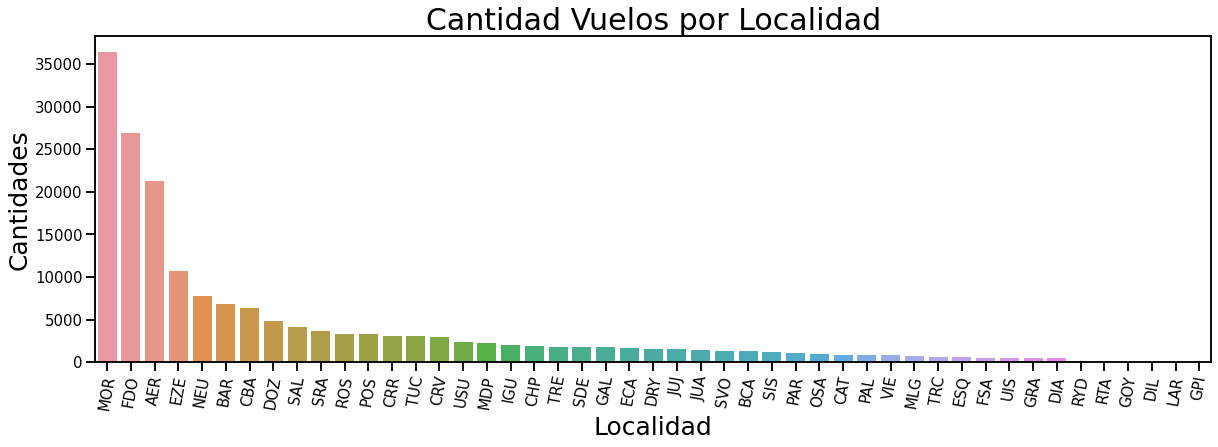

In [26]:
# veo cuánta cantidad de datos hay de cada Aeropuerto

idx = df['aeropuerto'].value_counts(ascending=False).index[0:]
sns.set_context("talk", font_scale=.9)
plt.figure(figsize=(20,6))
j = sns.countplot(x="aeropuerto", data=df, order=idx)
plt.xticks(rotation=80)
plt.title('Cantidad Vuelos por Localidad', size = 30)
plt.xlabel("Localidad", size = 25)
plt.ylabel("Cantidades", size = 25)
plt.show()

In [27]:
#agrupo por tipo de vuelo
vuelos_portipo = df.groupby(["clase_vuelo"])["fecha"].count()
vuelos_portipo.head()

clase_vuelo
No Regular                  18124
Regular                     62594
Trabajo Aéreo                 812
Vuelo Escuela               46287
Vuelo Oficial Extranjero       16
Name: fecha, dtype: int64

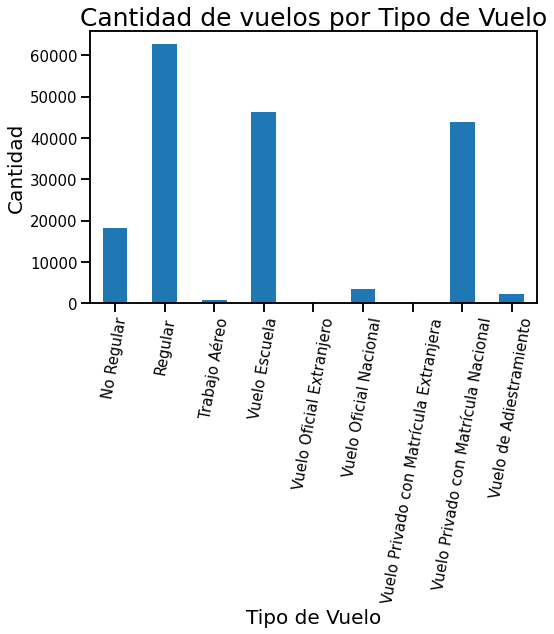

In [28]:
plt.figure(figsize=(8,5))
vuelos_portipo.plot.bar(x="clase_vuelo", y="fecha")
plt.xticks(rotation=80)
plt.xlabel("Tipo de Vuelo", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.title("Cantidad de vuelos por Tipo de Vuelo", size = 25)
plot_name = str(plot_path+'Viajes_regulares_por_Aeropuerto')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.show()

# Analizamos Regular por ser el tipo de vuelo con mayor cantidad de vuelos 

In [29]:
clase_regular = df.loc[df['clase_vuelo'] == 'Regular']

In [30]:
# observamos que la cantidad de renglones del nuevo dataframe es menor al del original, puesto que solo 
# estamos considerando los vuelos regulares
np.shape(clase_regular)

(62594, 14)

In [31]:
clase_regular.head(200000)

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2,anio,mes
1,2021-01-01,00:24,GRA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,70,DEFINITIVO,01/2021,2021,1
2,2021-01-01,00:26,ECA,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,70,DEFINITIVO,01/2021,2021,1
3,2021-01-01,00:29,SAL,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,12,DEFINITIVO,01/2021,2021,1
4,2021-01-01,00:37,TUC,EZE,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,26,DEFINITIVO,01/2021,2021,1
15,2021-01-01,07:09,EZE,ECA,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-800,35,DEFINITIVO,01/2021,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219798,2021-09-30,23:56,USU,AER,Regular,Dom,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8,86,PROVISORIO,09/2021,2021,9
219799,2021-09-30,23:57,BAR,AER,Regular,Dom,AER,AEROLINEAS ARGENTINAS SA,BO-737-800,86,PROVISORIO,09/2021,2021,9
219800,2021-09-30,23:57,AER,BAR,Regular,Dom,BAR,JETSMART AIRLINES S.A.,AIB-A320-232,92,PROVISORIO,09/2021,2021,9
219801,2021-09-30,23:59,AER,CRV,Regular,Dom,CRV,AEROLINEAS ARGENTINAS SA,BO-B737-800,59,PROVISORIO,09/2021,2021,9


In [32]:
print("Los registros de la clase Regular representan el " + str(np.round(np.shape(clase_regular)[0]/np.shape(df)[0],2)) + " de los registros totales")

Los registros de la clase Regular representan el 0.35 de los registros totales


# Visualización : Countplot

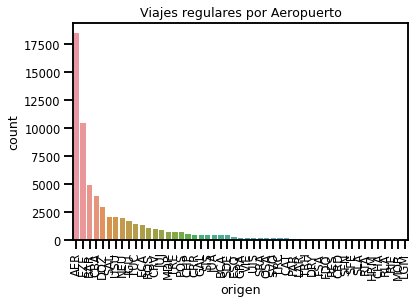

In [33]:
# con el comando "countplot" de Seaborn (importado como sns) generamos un gráfico de barras por la columna "aeropuerto",
#para ver cantidad de vuelos por localidad
sns.set_context("talk", font_scale=.7)
az = sns.countplot(x="origen", data=clase_regular, order=clase_regular['origen'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.title("Viajes regulares por Aeropuerto")
plot_name = str(plot_path+'Viajes_regulares_por_Aeropuerto')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.show()

In [34]:
#Realizamos un análisis de cantidad de pasajeros por Vuelo Regular por MES
pasajeros_pormes = clase_regular.groupby(["mes"])["pasajeros"].sum()

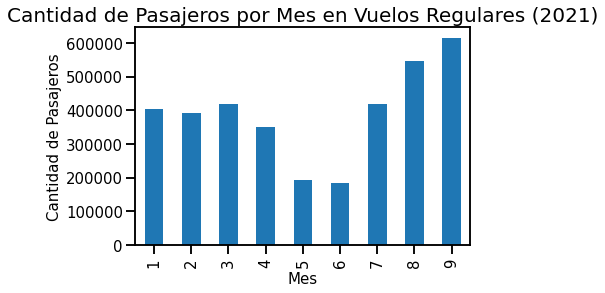

In [35]:
sns.set_context("talk", font_scale=.9)
pasajeros_pormes.plot.bar()
plt.title('Cantidad de Pasajeros por Mes en Vuelos Regulares (2021)', size = 20)
plt.xlabel("Mes", size = 15)
plt.ylabel("Cantidad de Pasajeros", size = 15)
plot_name = str(plot_path+'cant_vuelos_por_mes')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.show()

In [36]:
#podemos ver que, para los vuelos regulares, la temporada alta de pasajeros es en los meses de agosto y septiembre

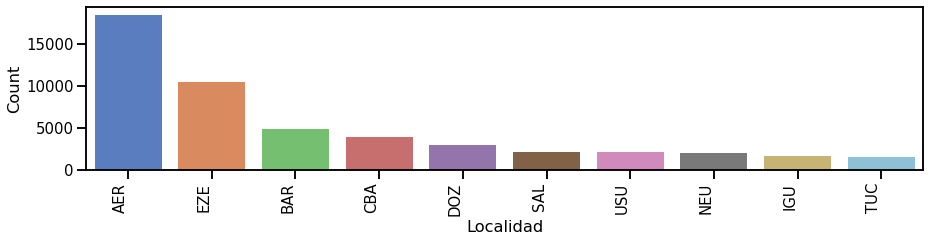

In [37]:
#vemos en detalle las 10 localidades con más vuelos
top_vuelos = clase_regular['origen'].value_counts().index[0:10]

plt.figure(figsize=(15,3))
g = sns.countplot(x='origen', data=clase_regular, palette = "muted",order=top_vuelos)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('',size = 20)
plt.xlabel("Localidad")
plt.ylabel("Count")
plot_name = str(plot_path+'cant_vuelos_regulares')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.show()

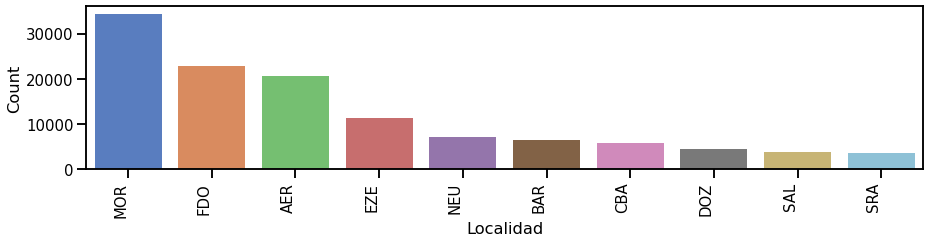

In [38]:
top_vuelos = df['origen'].value_counts().index[0:10]
#comparo las localidades más viajadas de los vuelos regulares vs de todos los vuelos

plt.figure(figsize=(15,3))
g = sns.countplot(x='origen',data=df, palette = "muted",order=top_vuelos)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('',size = 20)
plt.xlabel("Localidad")
plt.ylabel("Count")
plot_name = str(plot_path+'cant_vuelos_por_aeropuerto')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.show()

#podemos ver que, mientras que las 3 localidades que más vuelos regulares se realizan son AER (Aeroparque), EZE(Ezeiza) y BAR(Bariloche), 
#para el dataset en el que se toman en cuenta todos los tipos de vuelo, las 3 localidades más frecuentadas son MOR(Moreno), FDO(San Fernando) y AER(Aeroparque)
#podemos deducir que hay muchos vuelos escuela o de otro tipo a Moreno y San Fernando

In [39]:
aeropuertoPivot_regular = clase_regular.groupby(['mes','origen']).agg({'pasajeros':['sum'],'fecha':['count']})
aeropuertoPivot_regular

pasajeros fecha
                 sum count
mes origen                
1   BAR        43964   665
    BCA         1987    47
    CAT          707    25
    CBA        21963   406
    CHP         2703    37
...              ...   ...
9   TRH          309     7
    TUC        15239   217
    UIS         1231    33
    USU        31561   391
    VIE          587    24

[346 rows x 2 columns]

In [40]:
#Contamos la cantidad de pasajeros por aeropuerto, para la clase Regular
#aeropuertoPivot_regular = clase_regular[clase_regular.origen.isin(['AER', 'EZE', 'BAR', 'CBA', 'DOZ'])]
#aeropuertoPivot_regular_2 = aeropuertoPivot_regular.groupby(['mes','origen']).agg({'pasajeros':['sum'],'fecha':['count']})
#aeropuertoPivot_regular_2

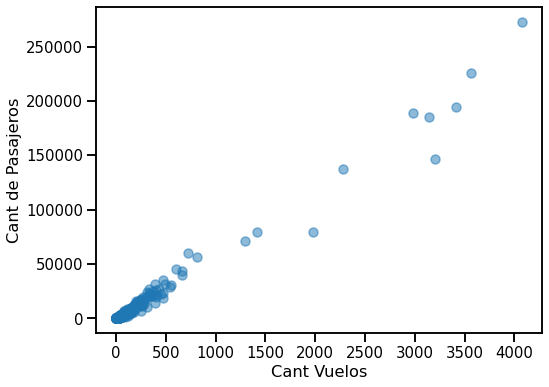

In [41]:
plt.figure(figsize=(8,6))
#sns.scatterplot(aeropuertoPivot_regular_2.sum,aeropuertoPivot_regular_2.count,palette='muted')
#plt.show()
plt.scatter(aeropuertoPivot_regular.fecha,aeropuertoPivot_regular.pasajeros, alpha=0.5)
plt.xlabel("Cant Vuelos")
plt.ylabel("Cant de Pasajeros")
plot_name = str(plot_path+'cant_vuelos-cant_pasajeros')
plot_format = ".png"
plt.savefig(plot_name+plot_format)
plt.show()

In [42]:
clase_escuela = df.loc[df['clase_vuelo'] == 'Vuelo Escuela']
np.shape(clase_escuela)

(46287, 14)

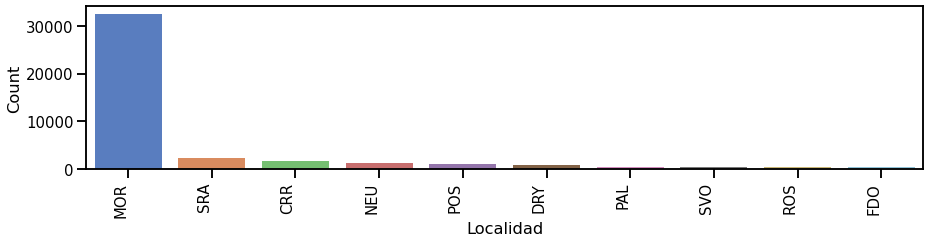

In [43]:
top_vuelos = clase_escuela['origen'].value_counts().index[0:10]

plt.figure(figsize=(15,3))
g = sns.countplot(x='origen', data=clase_escuela, palette = "muted",order=top_vuelos)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('',size = 20)
plt.xlabel("Localidad")
plt.ylabel("Count")
plt.show()

In [44]:
clase_privado = df.loc[df['clase_vuelo'] == 'Vuelo Privado con Matrícula Nacional']
np.shape(clase_privado)

(43870, 14)

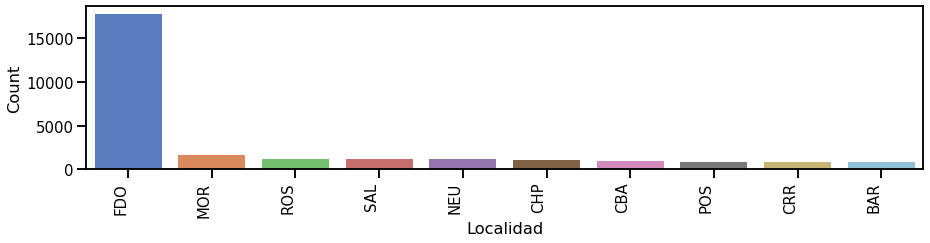

In [45]:
top_vuelos = clase_privado['origen'].value_counts().index[0:10]

plt.figure(figsize=(15,3))
g = sns.countplot(x='origen', data=clase_privado, palette = "muted",order=top_vuelos)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('',size = 20)
plt.xlabel("Localidad")
plt.ylabel("Count")
plt.show()

# Visualizacion: Boxplot con Seaborn para vuelos Regulares

In [46]:
# como AER es, por lejos, la localidad con mayor cantidad de vuelos (tanto despegue como aterrizaje),
# filtramos con ".loc" el dataframe "clase_regular" por el valor "AER" de la columna "aeropuerto",
#creando este nuevo df

aeropuerto_AER = clase_regular.loc[clase_regular.aeropuerto== 'AER']

In [47]:
(clase_regular.aeropuerto == 'AER').sum()

18816

In [48]:
aeropuerto_AER.head()

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2,anio,mes
59737,2021-03-15,22:11,CBA,AER,Regular,Dom,AER,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,44,DEFINITIVO,03/2021,2021,3
59827,2021-03-16,02:16,BAR,AER,Regular,Dom,AER,JETSMART AIRLINES S.A.,AIB-A320-232,73,DEFINITIVO,03/2021,2021,3
59829,2021-03-16,02:29,SAL,AER,Regular,Dom,AER,JETSMART AIRLINES S.A.,AIB-A320-232,64,DEFINITIVO,03/2021,2021,3
59843,2021-03-16,03:43,NEU,AER,Regular,Dom,AER,JETSMART AIRLINES S.A.,AIB-A320-232,58,DEFINITIVO,03/2021,2021,3
59872,2021-03-16,08:42,AER,USU,Regular,Dom,AER,JETSMART AIRLINES S.A.,AIB-A320-232,69,DEFINITIVO,03/2021,2021,3


In [49]:
#calculamos la cantidad de vuelos y la media de pasajeros por día, para los vuelos de AEROPARQUE
grouped_df = aeropuerto_AER.groupby('fecha').agg({'pasajeros':['mean'],'fecha':['count']})
grouped_df
flights_bydate= df.pivot_table(columns=['fecha'], aggfunc='size')
print(flights_bydate)

fecha
2021-01-01    228
2021-01-02    499
2021-01-03    567
2021-01-04    903
2021-01-05    737
             ... 
2021-12-05    470
2021-12-06    542
2021-12-07    539
2021-12-08    870
2021-12-09    633
Length: 273, dtype: int64


In [50]:
np.shape(grouped_df)

(200, 2)

In [51]:
np.shape(aeropuerto_AER)

(18816, 14)

In [52]:
aeropuerto_AER.drop(aeropuerto_AER.index[aeropuerto_AER['pasajeros'] == 0], inplace=True)
np.shape(aeropuerto_AER)

(18562, 14)

In [53]:
aeropuerto_AER['pasajeros'].describe()

count    18562.000000
mean        59.125525
std         21.886119
min          1.000000
25%         42.000000
50%         59.000000
75%         80.000000
max        100.000000
Name: pasajeros, dtype: float64

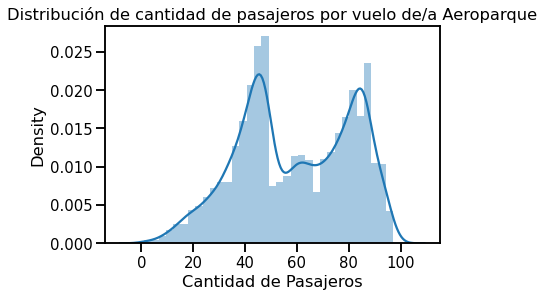

In [54]:
# distplot para la columna "pasajeros" nos generará un histograma + la distribución generada de los datos a partir de 
# sus frecuencias poblacionales.
sns.distplot(aeropuerto_AER['pasajeros'])
plt.title('Distribución de cantidad de pasajeros por vuelo de/a Aeroparque')
plt.xlabel('Cantidad de Pasajeros')
plt.show()

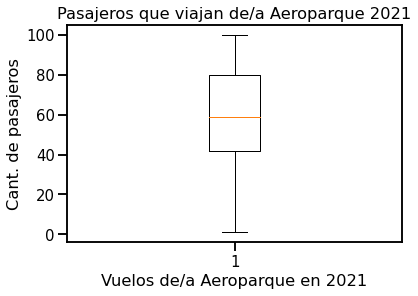

In [55]:
# boxplot realizado con Matplotlib
plt.boxplot(aeropuerto_AER['pasajeros'])
plt.title('Pasajeros que viajan de/a Aeroparque 2021')
plt.ylabel('Cant. de pasajeros')
plt.xlabel("Vuelos de/a Aeroparque en 2021")
plt.show()

In [56]:
# probamos hacer el mismo boxplot con seaborn
#sns.boxplot(x = "pasajeros", data =  aeropuerto_AER)
#plt.show()

# Datos Estadísticos

# Filtrado de Outliers con Quantiles
Calculamos el valor del percentil 90. Lo que esté sobre el percentil 80 lo llamaremos "temporada alta", y lo que esté por debajo, será "temporada regular". La "temporada baja" será debajo del percentil 10.

In [57]:
np.shape(aeropuerto_AER)

(18562, 14)

In [58]:
#calculo el percentil 80 de la columna "pasajeros" para el dataframe "aeropuerto_AER".
percentil_80 = aeropuerto_AER['pasajeros'].quantile(0.80)

In [59]:
# imprimimos en pantalla cuanto vale el percentil 0.80
percentil_80

83.0

In [60]:
#calculo el percentil 10 de la columna "pasajeros" para el dataframe "aeropuerto_AER".
percentil_10 = aeropuerto_AER['pasajeros'].quantile(0.10)

In [61]:
# imprimimos en pantalla cuanto vale el percentil 0.80
percentil_10

31.0

In [62]:
AER_temporada_alta = aeropuerto_AER.loc[aeropuerto_AER['pasajeros']>percentil_80]
AER_temporada_alta.drop(AER_temporada_alta.index[AER_temporada_alta['pasajeros'] == 0], inplace=True)
np.shape(AER_temporada_alta)

(3442, 14)

In [63]:
AER_temporada_regular = aeropuerto_AER.loc[(aeropuerto_AER['pasajeros'] >= percentil_10) & (aeropuerto_AER['pasajeros'] <= percentil_80)]
#AER_temporada_baja.drop(AER_temporada_baja.index[AER_temporada_baja['pasajeros'] == 0], inplace=True)
#np.shape(AER_temporada_baja)

In [64]:
AER_temporada_baja = aeropuerto_AER.loc[aeropuerto_AER['pasajeros']<percentil_10]

In [65]:
# observamos que dimensiones tienen ahora los dataframes de temporada alta y baja
np.shape(AER_temporada_alta)

(3442, 14)

In [66]:
np.shape(AER_temporada_regular)

(13360, 14)

In [67]:
np.shape(AER_temporada_baja)

(1760, 14)

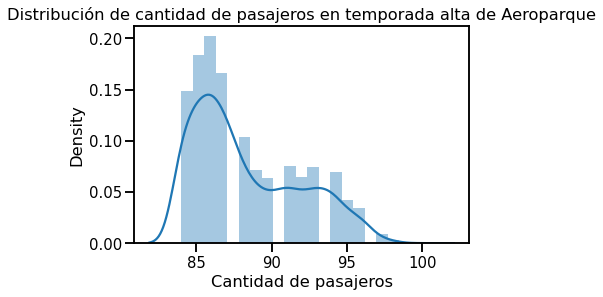

In [68]:
# hacemos un distplot de la columna pasajeros del dataframe "AER_temporada_alta"
sns.distplot(AER_temporada_alta['pasajeros'], norm_hist = False)
plt.title('Distribución de cantidad de pasajeros en temporada alta de Aeroparque')
plt.xlabel('Cantidad de pasajeros')
plt.show()

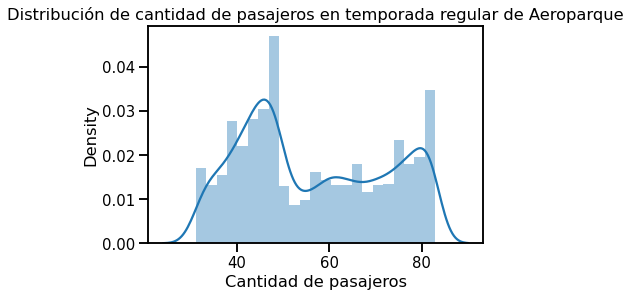

In [69]:
# hacemos un distplot de la columna pasajeros del dataframe "AER_temporada_regular"
sns.distplot(AER_temporada_regular['pasajeros'], norm_hist = False)
plt.title('Distribución de cantidad de pasajeros en temporada regular de Aeroparque')
plt.xlabel('Cantidad de pasajeros')
plt.show()

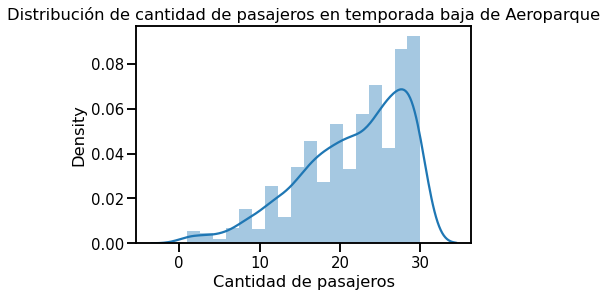

In [70]:
# hacemos un distplot de la columna pasajeros del dataframe "AER_temporada_baja"
sns.distplot(AER_temporada_baja['pasajeros'], norm_hist = False)
plt.title('Distribución de cantidad de pasajeros en temporada baja de Aeroparque')
plt.xlabel('Cantidad de pasajeros')
plt.show()

In [71]:
AER_temporada_alta['pasajeros'].describe()

count    3442.000000
mean       88.337885
std         3.560497
min        84.000000
25%        85.000000
50%        87.000000
75%        91.000000
max       100.000000
Name: pasajeros, dtype: float64

In [72]:
AER_temporada_baja['pasajeros'].describe()

count    1760.000000
mean       21.640909
std         6.553018
min         1.000000
25%        17.000000
50%        23.000000
75%        27.000000
max        30.000000
Name: pasajeros, dtype: float64

In [73]:
AER_temporada_regular['pasajeros'].describe()

count    13360.000000
mean        56.537500
std         15.649898
min         31.000000
25%         44.000000
50%         53.000000
75%         71.000000
max         83.000000
Name: pasajeros, dtype: float64

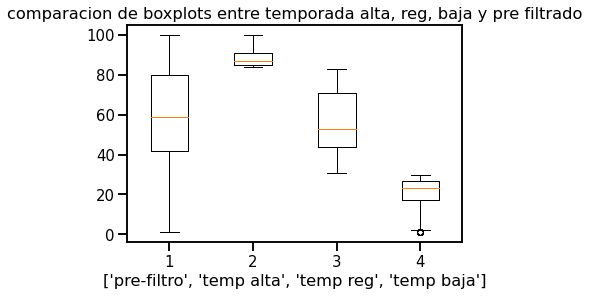

In [74]:
#comparación de boxplots
# con matplotlib hacemos un boxplot de los 3 grupos de datos. Ver que ingresamos 3 dataframes filtrados por la columna TOTAL
plt.boxplot([aeropuerto_AER['pasajeros'],AER_temporada_alta['pasajeros'], AER_temporada_regular['pasajeros'], AER_temporada_baja['pasajeros']])
plt.title('comparacion de boxplots entre temporada alta, reg, baja y pre filtrado')
plt.xlabel(['pre-filtro', 'temp alta', 'temp reg', 'temp baja'])
plt.show()

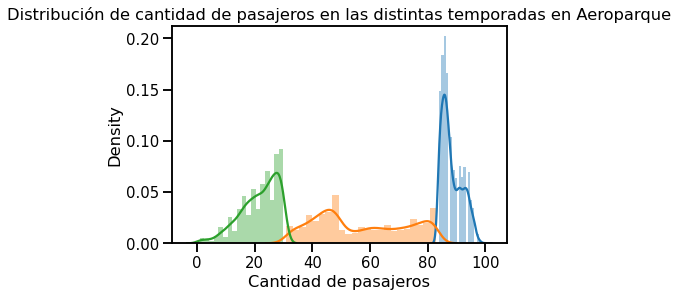

In [75]:
# hacemos dos displots en el mismo grafico. Uno para hora pico y otro para hora no pico.
sns.distplot((AER_temporada_alta['pasajeros']))
sns.distplot((AER_temporada_regular['pasajeros']))
sns.distplot((AER_temporada_baja['pasajeros']))
plt.title('Distribución de cantidad de pasajeros en las distintas temporadas en Aeroparque')
plt.xlabel('Cantidad de pasajeros')
plt.show()

,Mediana,Lim. Inferior,Lim. Superior
AER,58.0,42.0,100.0


,Mediana,Lim. Inferior,Lim. Superior
EZE,58.0,41.0,131.0


,Mediana,Lim. Inferior,Lim. Superior
TUC,58.0,45.0,97.0


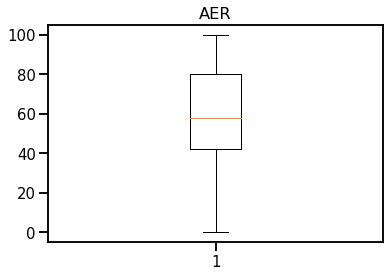

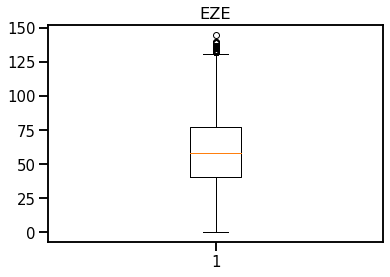

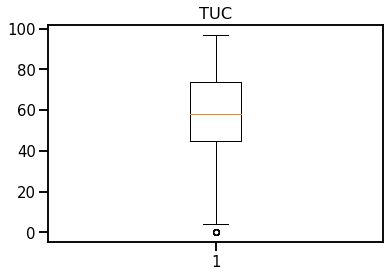

In [76]:
# Mediana, Limite inferior y superior de los 2 'aeropuerto's con mayor frecuencia de vuelos y el 10mo. (Para vuelos Regulares)

clase_regular_pivot= clase_regular[clase_regular['aeropuerto']=='AER']
plt.figure()
A = plt.boxplot(clase_regular_pivot['pasajeros'])
plt.title('AER')
medians = [median.get_ydata() for median in A["medians"]]
#whiskers
whiskers = [whiskers.get_ydata() for whiskers in A["whiskers"]]
#print(f'Valores outliers:\r\n{outliers[0]}\r\n')
df2delete = pd.DataFrame({'Mediana': medians[0][0],
                            'Lim. Inferior': whiskers[0][0],
                            'Lim. Superior': whiskers[1][1]},index=['AER'])
display(df2delete)
clase_regular_pivot= clase_regular[clase_regular['aeropuerto']=='EZE']
plt.figure()
A = plt.boxplot(clase_regular_pivot['pasajeros'])
plt.title('EZE')
medians = [median.get_ydata() for median in A["medians"]]
#whiskers
whiskers = [whiskers.get_ydata() for whiskers in A["whiskers"]]
df2delete = pd.DataFrame({'Mediana': medians[0][0],
                            'Lim. Inferior': whiskers[0][0],
                            'Lim. Superior': whiskers[1][1]},index=['EZE'])
display(df2delete)

clase_regular_pivot= clase_regular[clase_regular['aeropuerto']=='TUC']
plt.figure()
A = plt.boxplot(clase_regular_pivot['pasajeros'])
plt.title('TUC')
medians = [median.get_ydata() for median in A["medians"]]
#whiskers
whiskers = [whiskers.get_ydata() for whiskers in A["whiskers"]]
df2delete = pd.DataFrame({'Mediana': medians[0][0],
                            'Lim. Inferior': whiskers[0][0],
                            'Lim. Superior': whiskers[1][1]},index=['TUC'])
display(df2delete)

#print(f'Valores outliers:\r\n{outliers[0]}\r\n')

# Correlación Lineal

In [77]:
#analizamos la correlación de los 5 aeropuertos más frecuentados del tipo Regular, 
#según la cantidad de pasajeros por aeropuerto por mes

In [78]:
clase_regular_top=clase_regular[clase_regular.origen.isin(['AER', 'EZE', 'BAR', 'CBA', 'DOZ'])]
clase_regular_top.head()

,fecha,hora_UTC,origen,destino,clase_vuelo,clasificacion_vuelo,aeropuerto,aerolinea_nombre,aeronave,pasajeros,calidad_dato,fecha2,anio,mes
15,2021-01-01,07:09,EZE,ECA,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-800,35,DEFINITIVO,01/2021,2021,1
16,2021-01-01,08:10,EZE,JUJ,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,46,DEFINITIVO,01/2021,2021,1
17,2021-01-01,08:14,EZE,BAR,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-737-800,81,DEFINITIVO,01/2021,2021,1
19,2021-01-01,08:35,EZE,USU,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,74,DEFINITIVO,01/2021,2021,1
22,2021-01-01,09:04,EZE,NEU,Regular,Dom,EZE,AEROLINEAS ARGENTINAS SA,BO-B737-800,67,DEFINITIVO,01/2021,2021,1


In [79]:
clase_regular_top_c = pd.pivot_table(clase_regular_top,values = 'pasajeros', columns = 'origen', index = 'mes', aggfunc = np.sum)
clase_regular_top_c.head(9)
#los primeros dos meses del año, AER se encontraba cerrado por refacciones

origen,AER,BAR,CBA,DOZ,EZE
mes,,,,,
1,NaN,43964.0,21963.0,20473.0,194215.0
2,NaN,45437.0,20331.0,19318.0,185271.0
3,71381.0,35586.0,22259.0,21842.0,137847.0
4,147064.0,31631.0,18970.0,19603.0,10536.0
5,79799.0,11605.0,13856.0,11234.0,6562.0
6,79878.0,12370.0,12907.0,9985.0,5189.0
7,188789.0,39677.0,23801.0,18209.0,15316.0
8,226095.0,56748.0,29123.0,25358.0,25765.0
9,272745.0,60267.0,30673.0,27441.0,14943.0


In [80]:
#Analizamos cuán cerca están estas variables a tener una relación lineal (Correlación Lineal de Pearson) entre ellas
clase_regular_top_c_corr=clase_regular_top_c.corr()
clase_regular_top_c_corr.head(9)

origen,AER,BAR,CBA,DOZ,EZE
origen,,,,,
AER,1.000000,0.883714,0.868465,0.769224,-0.340701
BAR,0.883714,1.000000,0.951780,0.946538,0.268182
CBA,0.868465,0.951780,1.000000,0.948792,0.051177
DOZ,0.769224,0.946538,0.948792,1.000000,0.203398
EZE,-0.340701,0.268182,0.051177,0.203398,1.000000


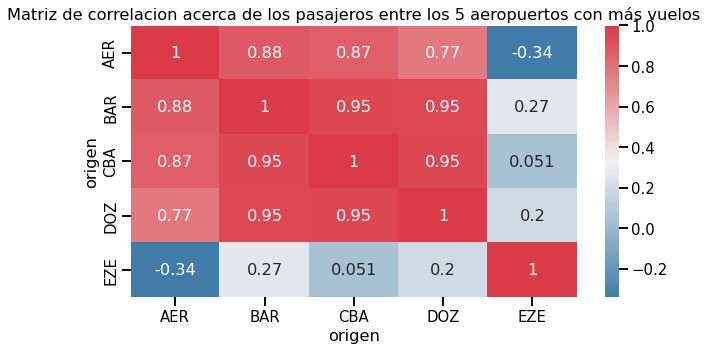

In [81]:
#Utilizamos el heatmap para visualizarlo
plt.figure(figsize=(10,5))
sns.heatmap(clase_regular_top_c_corr, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True))
plt.title("Matriz de correlacion acerca de los pasajeros entre los 5 aeropuertos con más vuelos")
plt.show()

In [82]:
#La mayor correlación es entre DOZ y CBA, DE 0,95. 
#CBA y BAR también se relacionan altamente (0,95)
#No existe correlación entre EZE y el resto de los aeropuertos debido a que en los primeros 2 meses y medio del año AER se encontraba cerrado y EZE tomó los vuelos Regulares/
#Cuando AER volvió a tener vuelos a mediados de marzo, EZE comenzó a bajar considerablemente la cantidad de pasajeros para vuelos regulares.